In [28]:
import numpy as np
import matplotlib.pylab as plt

def derivate(f,x,h):
    dx = np.imag(f(x+1j*h))/h
    return dx

def f(x):
    y = np.sin(x)**5
    return y

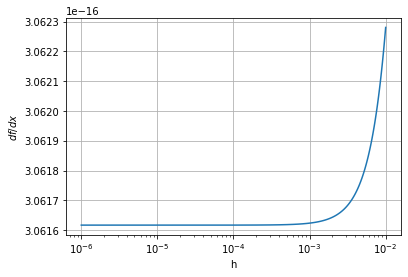

In [50]:
h = np.linspace(10**(-6),10**(-2),100)
x = np.pi/2
dx = derivate(f,x,h)
plt.plot(h,dx)
plt.xscale('log')
plt.xlabel('h')
plt.ylabel('df/dx')
plt.grid()
plt.show()

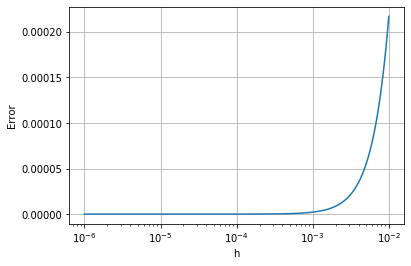

In [51]:
dxReal = 5*np.cos(x)*np.sin(x)**4
error = (dx-dxReal)/dxReal
plt.plot(h,error)
plt.xscale('log')
plt.xlabel('h')
plt.ylabel('Error')
plt.grid()
plt.show()

El mejor h para esta derivada es cualquiera menor o igual a $10^-4$

In [65]:
def predict(alpha, X, kernel, x):
    K=[]
    for i in range(len(X)):
        K.append(kernel(X[i],x))
    K=np.array(K)
    result = np.dot(alpha,K)
    return result

def loss(alpha, X, kernel, x, y):
    E=np.abs(y-predict(alpha,X,kernel,x))
    return  E

def num_de_dalpha(alpha, X, kernel, x, y, epsilon):
    d_alpha = (loss(alpha+epsilon/2, X, kernel, x, y)-loss(alpha-epsilon/2, X, kernel, x, y))/epsilon
    return d_alpha

In [71]:
def k1(x, y):
    return np.dot(x, y)

def k2(x, y):
    return (np.dot(x, y) + 1) ** 2

def de_dalpha(alpha, X, kernel, x, y):
    K=[]
    for i in range(len(X)):
        K.append(kernel(X[i],x))
    K=np.array(K)
    de = -np.sign(y-predict(alpha, X, kernel, x))*K
    return de

def test_de_dalpha(kernel):
    num_tests = 100
    epsilon = 0.0001
    X = [[-2, -1],
         [-1, 3],
         [2.5, -1.5],
         [4, 2]]
    for i in range(num_tests):
        talpha = np.random.randn(len(X))
        tx = np.random.randn(2)
        ty = np.random.randn(1)
        if np.linalg.norm(de_dalpha(talpha, X, kernel, tx, ty) - num_de_dalpha(talpha, X, kernel, tx, ty, epsilon)) > epsilon:
            return False
    return True

def test2():
    return test_de_dalpha(k1) and test_de_dalpha(k2)

In [72]:
test_de_dalpha(k2)

False

In [74]:
def train(X, Y, epochs, eta, alpha_ini, kernel):
    losses = []
    alpha = alpha_ini
    for epoch in range(epochs):
        loss_tmp=0
        for j in range(len(X)):
            #forward propagation
            prediction=predict(alpha,X,kernel,X[j]) # Here is the prediction function we show at the begining
            #Back propagation
            alpha-=   # Here we compute the derivatives times the learning rate and we subtract the value of alpha times its derivative
        for j in range(len(x)):
            loss_tmp+=loss(alpha, X, kernel, X[j], Y[j])
        losses.append(loss_tmp)   
    return alpha, losses

X = [[-2, -1],
     [-1, 3],
     [2.5, -1.5],
     [4, 2]]
Y = [1, 1, 1, -1]

for x in X:
    print(predict(alpha, X, k2, x))

NameError: name 'alpha' is not defined